In [1]:
import sys
sys.path.append("../build")

In [2]:
import lib.parquet_table as pqt

In [3]:
pt = pqt.ParquetTable("../data/trade/bitmex/XBTUSD/20221109.parquet")

In [4]:
pt.print_stats()

Loaded 250202 rows in 4 columns.
Field names: 
Field 1: 'time' has type int64
Field 2: 'side' has type utf8
Field 3: 'size' has type int64
Field 4: 'price' has type double


In [ ]:
pt.column(0)

In [5]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
df = pd.DataFrame({ 
    "time": pt.column(0),
    "price": pt.column(3),
    "size": pt.column(2)
})

In [ ]:
def parse_time(x):
    x = datetime.datetime.fromtimestamp(x/1e6)
    return x.strftime('%H:%M')
    
df['time_bin'] = df['time'].apply(parse_time)

In [13]:
df.head()

,time,price,size,time_bin
0,1667952000282715,18529.5,1800,01:00
1,1667952001348456,18529.5,900,01:00
2,1667952001348456,18529.5,4100,01:00
3,1667952001902090,18529.5,1500,01:00
4,1667952005189098,18529.5,5000,01:00


In [14]:
df.tail()

,time,price,size,time_bin
250197,1668038399775591,15891.5,100,00:59
250198,1668038399797091,15891.5,300,00:59
250199,1668038399797091,15895.5,200,00:59
250200,1668038399836343,15896.0,400,00:59
250201,1668038399836343,15896.0,100,00:59


In [16]:
tf = df.groupby('time_bin').agg({
    'size': np.sum,
    'price': lambda x: x.iloc[-1]
}).reset_index()
tf.head()

,time_bin,size,price
0,00:00,365500,15781.0
1,00:01,471200,15759.0
2,00:02,552700,15757.0
3,00:03,331900,15715.5
4,00:04,1584100,15625.5


<AxesSubplot: xlabel='time_bin'>

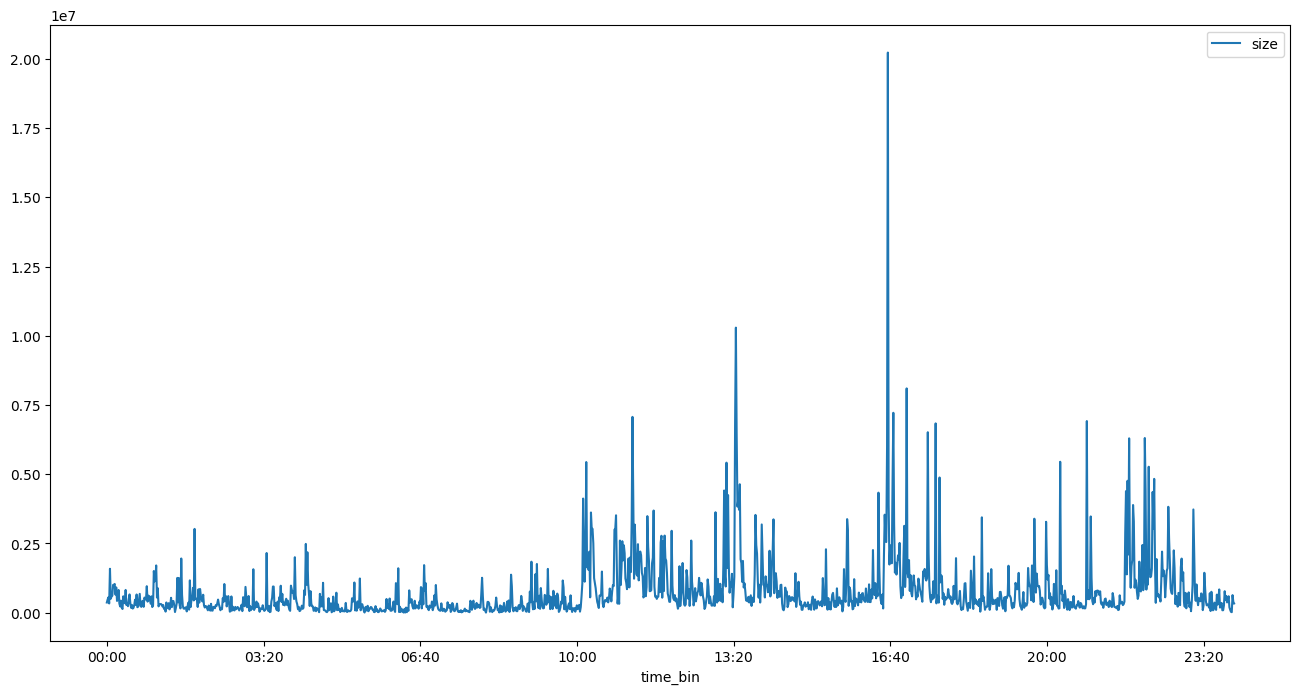

In [17]:
tf.plot(x='time_bin', y=['size'], figsize=(16, 8))

In [ ]:
plt.hist(np.log(s),bins=100)

In [ ]:
plt.style.use('_mpl-gallery')

plt.plot(pt1.column(0), pt1.column(3), linewidth=.2, c='red', label='Price')
plt.plot(pt1.column(0), pt1.column(2), linewidth=.2, c='blue', label='Volume')
plt.xlabel("Time")

plt.legend()

plt.show()



In [ ]:
!{sys.executable} -m pip install pyarrow

In [ ]:
!{sys.executable} -m pip install fastparquet

In [ ]:
from fastparquet import ParquetFile
pf = ParquetFile("../data/trade/bitmex/XBTUSD/20221109.parquet")

In [ ]:
df = pf.to_pandas()